
A neural network is a **mathematical function**. So what's that?

A function is a mapping or transformation where each unique set of inputs is equal to exactly one output.

In highschool, the [vertical line test](https://en.wikipedia.org/wiki/Vertical_line_test) was used to determine whether a line was a function.

![](vertical_line_test.jpg)

This post will go through basics of how to fit a line to some data.

## 1. Import Libraries

In [1]:
from ipywidgets import interact
from fastai.basics import *
import pandas as pd

## 2. Upload and Plot Data

In [2]:
df = pd.read_csv("upload_dataset.csv")
df.head()

,x,y
0,-2.000000,11.869037
1,-1.789474,6.543284
2,-1.578947,5.939607
3,-1.368421,2.630370
4,-1.157895,1.794741


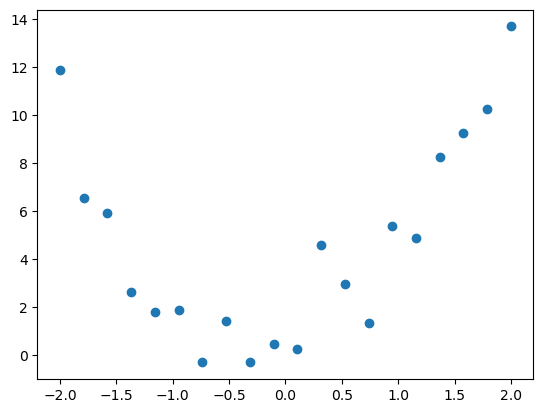

In [3]:
plt.scatter(df.x, df.y)

## 3. Quadratic Equation

### 3.1 General Quadratic Equation

In [4]:
def gen_quad_fn(a,b,c,x): return a*x**2 + b*x + c

### 3.2 Custom Quadratric Equation

In [5]:
def custom_quad_fn(a,b,c): return partial(gen_quad_fn,a,b,c)

### 3.3 Creating $1x^2 + 1x + 1$

In [6]:
quad_111 = custom_quad_fn(1,1,1)

### 3.4 Plotting $1x^2 + 1x + 1$

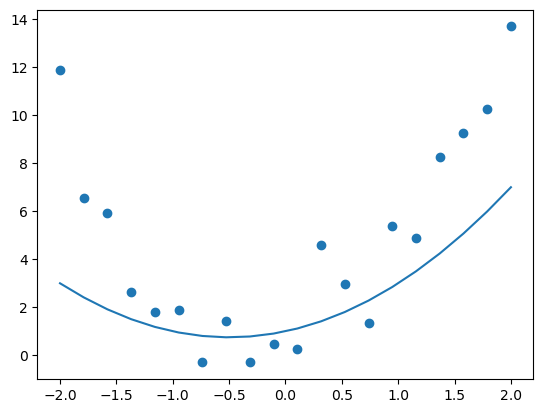

In [7]:
# plt.plot(xs,ys)
xs_111 = df.x
ys_111 = quad_111(xs_111)
plt.plot(xs_111,ys_111)
plt.scatter(df.x, df.y)


### 3.4 Interactive Quadratic Equation

The coefficients `a`, `b` and `c` of the Quadratic Function can be adjusted which in turn changes the shape of the line.

In [8]:
plt.rc('figure', dpi=90)

@interact(a=(0,5,0.1),b=(0,5,0.1),c=(0,5,0.1))
def interactive_plot(a,b,c):
# 1.plot scatter
    plt.scatter(df.x, df.y)    
# 2.  create custom_quad_interactive_fn
# 2.1 create xs_interact    
    xs_interact = torch.linspace(-2.1,2.1,100)
# 3.  plot custom_quad_interactive
    plt.ylim(-1,15)
    plt.plot(xs_interact, custom_quad_fn(a,b,c)(xs_interact))

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0), FloatSlider(value=2.0, description='b'…

### 3.5 Mean Squared Errors (MAE)

By calculating a Loss Function such as Mean Squared Errors, we can numerically determine what is the 'best' fit of our line to the data.

In [9]:
def mae(prediction, actual): return np.mean((prediction-actual)**2)

In [10]:
plt.rc('figure', dpi=90)

@interact(a=(0,5,0.1),b=(0,5,0.1),c=(0,5,0.1))
def interactive_plot2(a,b,c):
# 1.    plot scatter
    plt.scatter(df.x, df.y)

# 2     create custom_quad_interactive_fn
# 2.1   create xs_interact    
    xs_interact = torch.linspace(-2.1,2.1,100)

# 3.    create ys_interact
    plt.ylim(-1,15)
    ys_interact = custom_quad_fn(a,b,c)(xs_interact)

# 4.    calc mae
    y_actual     = df.y
    y_predicted  = custom_quad_fn(a,b,c)(df.x)
    interact_mae = round(mae(y_actual, y_predicted),3)

# 5. plot   
    plt.plot(xs_interact, ys_interact)
    plt.title(f"MAE: {interact_mae}")


interactive(children=(FloatSlider(value=2.0, description='a', max=5.0), FloatSlider(value=2.0, description='b'…

## To be Continued...  

We will use some automated way to find the smallest MAE.

[Part 1: tba]()   
[Part 2: tba]()